In [1]:
import time
start_time = time.time()

# Cleaning data - changing everything into neumeric value

In [2]:
import pandas as pd 
import ast
from ast import literal_eval
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

#setting the file we want to read
file = "train.csv"

#reading from CSV
df = pd.read_csv(file, header= 0, quotechar='"', sep=',', encoding = "ISO-8859-1",keep_default_na=True, 
                dtype = { 'belongs_to_collection' : 'category',  'genres' : 'category', 'original_language' : 'category', 'production_companies' : 'category', 'production_countries' : 'category',  'spoken_languages' : 'category', 'Keywords' : 'category', 'cast' : 'category', 'crew' : 'category'},
                na_values = [0]
                )

#setting the list to be edited
dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']
dataID = { 'belongs_to_collection' : 'id',  'genres': 'id', 'production_companies': 'id', 'production_countries': 'iso_3166_1',  'spoken_languages': 'iso_639_1', 'Keywords': 'id', 'cast': 'id', 'crew': 'id'}
dataNeeded = ['id', 'belongs_to_collection', 'budget', 'genres', 'original_language',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'Keywords',
       'cast', 'crew', 'revenue']

#dropping the columns that was not needed
for col in df.keys():
    if not (col in dataNeeded) :
        df = df.drop(columns = col)
        
#http://www.maths.bath.ac.uk/~jjf23/LMR/python/missing.html

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(~df.isna(), aspect='auto')
label = df.keys().tolist()
plt.imshow(~df.isna(), aspect='auto')
plt.xlabel("col")
plt.ylabel("samples")
ax.set_xticks(np.arange(len(label)))
ax.set_xticklabels(label)
fig.autofmt_xdate()
plt.title("Plot of missing data")
plt.gray()
plt.show()

#filling empty list with []
for col in dataList :
    try:
        df[col] = df[col].cat.add_categories('[]',inplace = False)
    except:
        pass
    df[col].fillna( '[]' , inplace = True) 

#changing a sting of list into list
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval)     

#changing the dict in the list into ID only
for col in dataList : 
    for row in range(len(df)) :
        for num in range(len(df[col][row])) :
            if not (isinstance(df[col][row][num], int) or isinstance(df[col][row][num], str)):
                df[col][row][num] = df[col][row][num][dataID[col]]    

# getting all unique values
uniqueSpokenLanguage = df['spoken_languages'].apply(pd.Series).stack().value_counts().keys().values.tolist()
for row in range(len(df)) :
    for num in range(len(df['spoken_languages'][row])):
        df['spoken_languages'][row][num] = uniqueSpokenLanguage.index(df.spoken_languages[row][num])

uniqueOrgLanguage = df['original_language'].unique().tolist()
df.original_language = df.original_language.replace(uniqueOrgLanguage,range(len(uniqueOrgLanguage)))

uniqueCountries = df['production_countries'].apply(pd.Series).stack().value_counts().keys().values.tolist()

for row in range(len(df)) :
    for num in range(len(df['production_countries'][row])):
        df['production_countries'][row][num] = uniqueCountries.index(df.production_countries[row][num])
print(time.time() - start_time)
df.head()

<Figure size 2000x1000 with 1 Axes>

20.535656213760376


,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast,crew,revenue
0,1,[313576],14000000.0,[35],0,6.575393,"[4, 60, 8411]",[0],2/20/15,93.0,[0],"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115...","[1449071, 3227, 347335, 347335, 57822, 1451395...",12314651
1,2,[107674],40000000.0,"[35, 18, 10751, 10749]",0,8.248895,[2],[0],8/6/2004,113.0,[0],"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1...","[1201, 1214, 4500, 8851, 12970, 38415, 38416, ...",95149435
2,3,[],3300000.0,[18],0,64.299990,"[2266, 3172, 32157]",[0],10/10/2014,105.0,[0],"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366...","[494, 6745, 9250, 23783, 23786, 53181, 52443, ...",13092000
3,4,[],1200000.0,"[53, 18]",1,3.174936,[],[5],3/9/2012,122.0,"[0, 8]","[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,...","[95510, 95510, 95510]",16000000
4,5,[],NaN,"[28, 53]",2,1.148070,[],[15],2/5/2009,118.0,[11],[],"[84751, 64453, 84752, 1130534]","[84749, 84749]",3923970


In [3]:
#changing the time into numerical value

import multiprocessing
from multiprocessing import Pool
import CleaningFunctions
from functools import partial
from IPython.display import display, clear_output
import math

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = range(len(df))
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.time2num, df)
    result = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)

df["release_date"] = result

Using TensorFlow backend.


273.1665744781494


In [4]:
# save to save.csv
df.to_csv('save_ORG.csv',index_label = False)
#df = pd.read_csv('save_ORG.csv')

# Getting only low variance value for vectors that is too large to compute

In [5]:
# adding the extra columns for the most related crew

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = dataList
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.Getting3MostRelated, df)
    df_temp = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)
    
for bigCol in range(len(df_temp)):
    for smallCol in df_temp[bigCol][0]:
        df[smallCol] = df_temp[bigCol][0][smallCol]

98.0134162902832


In [6]:
#dropping the extra columns that was already extracted
for col in dataList:
    if(col in df):
        df = df.drop(columns=col)
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,1,14000000.0,0,6.575393,21964.75,93.0,12314651,NaN,NaN,NaN,...,NaN,7.463031e+15,7.449936e+16,7.540766e+16,2.572826e+13,1.362847e+14,1.670920e+14,NaN,8.045325e+12,6.325491e+13
1,2,40000000.0,0,8.248895,18114.75,113.0,95149435,NaN,NaN,NaN,...,NaN,NaN,NaN,1.102467e+16,6.287784e+14,1.284649e+15,2.378023e+15,1.120362e+15,1.185739e+15,1.997366e+15
2,3,3300000.0,0,64.299990,21831.75,105.0,13092000,NaN,NaN,NaN,...,NaN,1.653886e+14,1.579289e+15,5.980194e+15,2.205357e+14,5.081406e+14,2.180879e+15,3.485830e+13,3.628084e+14,3.628084e+14
3,4,1200000.0,1,3.174936,20886.75,122.0,16000000,NaN,NaN,NaN,...,NaN,1.605927e+14,4.772432e+14,2.708830e+15,NaN,4.148560e+13,NaN,0.000000e+00,0.000000e+00,0.000000e+00
4,5,NaN,2,1.148070,19758.75,118.0,3923970,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking if the data make sense

In [7]:
# counting the unique value for each col (idk why i am doing this too lol)
unique_count = {}
for col in df:
    count = df[col].apply(pd.Series).stack().value_counts().tolist()
    unique_count.update({col: count})

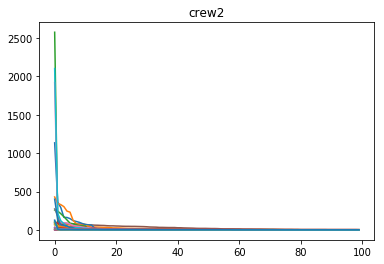

In [8]:
for col in unique_count:
    unique_count[col] = unique_count[col][0:100]
    plt.plot(unique_count[col])
    plt.title(col)

In [9]:
# save to save.csv
df.to_csv('save_BeforeNormalize.csv',index_label = False)
df = pd.read_csv('save_BeforeNormalize.csv')

# Verification for the predicting method

In [10]:
#creating df df_pred to do prediction for those with non-nan values > 2000

predicting_list = []
for col in df:
    
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col, df[col].count())
predicting_list.remove("revenue")

df_pred = pd.read_csv('save_BeforeNormalize.csv')
df_pred = df_pred[predicting_list].copy()

belongs_to_collection0 132
belongs_to_collection1 0
belongs_to_collection2 0
genres2 1428
production_companies1 1214
production_companies2 606
production_countries1 717
production_countries2 191
spoken_languages1 865
spoken_languages2 319


In [11]:
#creating a df_complete that was copied from the origional df with rows that have no missing value

completeList = []
for x in range(len(df)):
    flag = 0
    for col in predicting_list:
        if (np.isnan(df_pred[col][x])):
            flag = 1
    if flag == 0:
        completeList.append(x)      
        
df_complete = pd.DataFrame()
rows = df_pred.loc[completeList]
df_complete = df_complete.append(rows, ignore_index=True)

In [12]:
# calculating the missing rate of df_pred

missing = sum(len(df_pred) - df_pred.count())
assist = sum(df.count())

tar_miss_rate = missing/(missing+assist)
tar_miss_rate

0.13996962261946488

In [13]:
df_complete.head()

,id,budget,original_language,popularity,release_date,runtime,genres0,genres1,production_companies0,production_countries0,spoken_languages0,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,17,26000000.0,0,6.336927,18477.75,85.0,7.584055e+15,1.352438e+16,2.385041e+15,2.330161e+16,1.266112e+16,4.975964e+15,7.462317e+15,1.075076e+16,5.081406e+14,5.419396e+14,5.681531e+14,2.226739e+14,3.624643e+14,1.068048e+15
1,20,32000000.0,0,11.359659,18475.75,87.0,1.101972e+16,1.352438e+16,2.834412e+14,4.490815e+15,1.660005e+16,3.231662e+15,4.186604e+15,7.446559e+15,9.407721e+14,1.209224e+15,1.492543e+15,2.463298e+14,2.462004e+15,2.597878e+15
2,30,45000000.0,0,7.818620,17262.75,89.0,1.101972e+16,1.352438e+16,4.203938e+16,2.330161e+16,2.092102e+16,1.312882e+15,6.698661e+15,3.902698e+16,1.267271e+15,1.573269e+15,1.973575e+15,1.003764e+15,3.352148e+15,3.618195e+15
3,33,90000000.0,0,13.412445,22207.75,106.0,3.867814e+16,5.603600e+16,2.284777e+15,2.330161e+16,2.092102e+16,2.152685e+15,4.904639e+16,9.870477e+16,2.706388e+15,3.666155e+15,3.992857e+15,6.592168e+14,7.074689e+14,7.700017e+14
4,38,50000000.0,0,13.676444,14677.75,127.0,8.771844e+15,1.352438e+16,3.643953e+15,2.330161e+16,7.350162e+15,3.753525e+15,3.912175e+15,5.346988e+15,4.323476e+15,4.829897e+15,4.863302e+15,4.258446e+15,5.423334e+15,5.528942e+15


In [14]:
#normalizing the testing set
from sklearn import preprocessing

# Normalize Training Data 
std_scale_fullset = preprocessing.StandardScaler().fit(df_complete)
x_train_norm = std_scale_fullset.transform(df_complete)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=df_complete.index, columns=df_complete.columns) 
df_complete.update(training_norm_col)

df_complete.head()

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,id,budget,original_language,popularity,release_date,runtime,genres0,genres1,production_companies0,production_countries0,spoken_languages0,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.770020,-0.500060,-0.086432,-0.353710,0.182939,-1.412156,-0.441388,-0.472008,-0.541037,0.460044,-1.385540,-0.032750,-0.095706,-0.212035,-0.318345,-0.368046,-0.412163,-0.307036,-0.343272,-0.345470
1,-1.766474,-0.384414,-0.086432,-0.095000,0.182390,-1.316047,-0.029009,-0.472008,-0.636116,-2.661442,-0.518736,-0.179727,-0.286075,-0.337450,-0.284452,-0.328601,-0.367130,-0.304308,-0.169551,-0.254562
2,-1.754655,-0.133847,-0.086432,-0.277392,-0.150889,-1.219938,-0.029009,-0.472008,1.252975,0.460044,0.432142,-0.341406,-0.140086,0.861226,-0.258874,-0.307081,-0.343696,-0.216968,-0.095899,-0.193932
3,-1.751109,0.733500,-0.086432,0.010734,1.207776,-0.403014,3.290795,2.161968,-0.545573,0.460044,0.432142,-0.270643,2.320957,3.126376,-0.146132,-0.183364,-0.245324,-0.256698,-0.314726,-0.363181
4,-1.745199,-0.037475,-0.086432,0.024332,-0.861131,0.606128,-0.298819,-0.472008,-0.484083,0.460044,-2.554276,-0.135755,-0.302023,-0.417142,-0.019448,-0.114571,-0.202919,0.158327,0.075476,-0.080389


In [15]:
# sampling from df_complete to creat df_complete_sampled for the same missing rate

import random

df_complete_sampled_list = []

for tar_miss_rate in range(6, 30, 3):
    
    tar_miss_rate = tar_miss_rate/100
    df_complete_sampled = df_complete.copy()
    
    exclude_id_colList = df_complete.columns.tolist()[1:]

    for x in range(len(df_complete)):
        for col in exclude_id_colList:
            rand = random.random()
            if (rand <= tar_miss_rate):
                df_complete_sampled[col][x] = np.nan
                
    df_complete_sampled_list.append(df_complete_sampled)

In [16]:
# seperating the col that we want to do MSE or Hit_Rate
col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 'production_companies0',
       'production_companies1', 'production_countries0', 'spoken_languages0']
           
col_Hit = ['id', 'genres0', 'genres1','Keywords0', 'Keywords1', 'Keywords2', 'cast0', 'cast1', 'cast2',
       'crew0', 'crew1', 'crew2']

In [17]:
#Reading the very original dataframe with things as list

orgDF = pd.read_csv('save_ORG.csv')

#changing a sting of list into list
for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)     

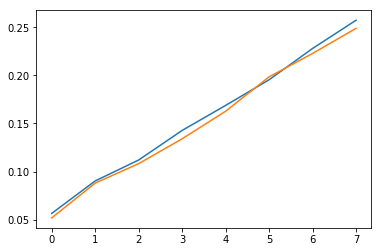

In [18]:
missing_rate_list = []
missing_rate_list_col_Hit = []
for df_complete_sampled in df_complete_sampled_list:

    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled) - df_complete_sampled.count())
    assist = sum(df_complete_sampled.count())

    miss_rate = missing/(missing+assist)
    missing_rate_list.append(miss_rate)
    #print("df_complete_sampled geh missing rate", miss_rate)
    
    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled[col_Hit]) - df_complete_sampled[col_Hit].count())
    assist = sum(df_complete_sampled[col_Hit].count())

    miss_rate = missing/(missing+assist)
    missing_rate_list_col_Hit.append(miss_rate)
    #print("df_complete_sampled with list col geh missing rate", missing,missing+assist,miss_rate)


#plt.plot(list(range(6, 30, 3)))
plt.plot(missing_rate_list)
plt.plot(missing_rate_list_col_Hit)

In [19]:
print("you")

you


In [23]:
# calling function PredictingMethodVerfication to check each imputetion method with evaluation
# 1. rmse for numeric columns
# 2. hit rate for the columns with a list (crew, cast, etc)
# 3. total rmse for all columns

from sklearn.metrics import mean_squared_error
from fancyimpute import KNN 
import matplotlib.pyplot as plt

start_time = time.time()

if __name__ ==  '__main__': 
    
    result = {}
  

    iterable = [(i, df_complete_sampled) for i, df_complete_sampled in enumerate(df_complete_sampled_list)] 

    pool = multiprocessing.Pool(len(df_complete_sampled_list))
    func = partial(CleaningFunctions.PredictingMethodVerfication, df_complete, missing_rate_list,std_scale_fullset)

    result['rms'],result['rmsAll'], result['hit'] = zip(*pool.map(func, iterable))
    pool.close()
    pool.join()
    print(time.time() - start_time)

144.6373007297516


In [ ]:
rmsDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'])
rmsAllDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'])
hitDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'])

for i, ms in enumerate(result['rms']):
    rmsDict = rmsDict.append(result['rms'][i])
    
for i, ms in enumerate(result['hit']):
    hitDict = hitDict.append(result['hit'][i])
    
for i, ms in enumerate(result['rmsAll']):
    rmsAllDict = rmsAllDict.append(result['rmsAll'][i])

In [ ]:
plt.figure()
rmsDict.plot(figsize=(15, 10))
plt.title("RMSE for numeric columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

plt.figure()
hitDict.plot(figsize=(15, 10))
plt.title("HIT RATE for columns with a list (crew, cast, etc)")
plt.ylabel('HIT RATE')
plt.xlabel('Missing Rate')

plt.figure()
rmsAllDict.plot(figsize=(15, 10))
plt.title("RMSE for ALL columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

In [35]:
missing_rate_list

[0.05603230691569914,
 0.08493185259969713,
 0.11113915530876661,
 0.1420158169274777,
 0.1680127881541309,
 0.19876325088339222,
 0.22324583543664817,
 0.25391216557294294]

# Normalizing the data and seperating the train and test set

In [24]:
#from https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

from sklearn import preprocessing
#Select numerical columns which needs to be normalized
train_norm = df[df.columns[0:2400]]
test_norm = df[df.columns[2400:3005]]

# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
df.update(training_norm_col)

df.head()

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\utils\extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\utils\extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,NaN,...,NaN,0.197043,3.727740,2.140623,-0.200679,-0.298285,-0.355085,NaN,-0.250247,-0.261687
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.134342,-0.164786,-0.228155,-0.246842,-0.113232,-0.154147,-0.153038
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.390218,-0.411356,-0.312588,-0.189085,-0.275576,-0.256494,-0.253800,-0.221298,-0.244860
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,-0.390604,-0.473910,-0.428181,NaN,-0.304075,NaN,-0.258314,-0.250904,-0.265241
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# save to save.csv

df.to_csv('save_Cleaned.csv',index_label = False)
df = pd.read_csv('save_Cleaned.csv')

# Prediction with the chosen imputetion method

In [27]:
#creating df df_pred to do prediction for those with non-nan values > 2000
predicting_list = []
print("These are the columns that we are not doing prediction to fill the empty cell")
for col in df:
    
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col,df[col].count())
predicting_list.remove("revenue")


df_pred = pd.DataFrame()
df_pred = df[predicting_list].copy()

These are the columns that we are not doing prediction to fill the empty cell
belongs_to_collection0 132
belongs_to_collection1 0
belongs_to_collection2 0
genres2 1428
production_companies1 1214
production_companies2 606
production_countries1 717
production_countries2 191
spoken_languages1 865
spoken_languages2 319


In [28]:
#cause knn dosent accept a string heading, so changng the heading
df_pred.columns = range(df_pred.shape[1])
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,0.119650,NaN,-0.278422,0.501173,0.491417,0.197043,3.727740,2.140623,-0.200679,-0.298285,-0.355085,NaN,-0.250247,-0.261687
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,-0.234607,-0.565141,3.508197,0.501173,0.491417,NaN,NaN,-0.134342,-0.164786,-0.228155,-0.246842,-0.113232,-0.154147,-0.153038
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.234607,NaN,-0.486973,0.501173,0.491417,-0.390218,-0.411356,-0.312588,-0.189085,-0.275576,-0.256494,-0.253800,-0.221298,-0.244860
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.234607,-0.398489,NaN,-1.739620,-2.761382,-0.390604,-0.473910,-0.428181,NaN,-0.304075,NaN,-0.258314,-0.250904,-0.265241
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,0.307981,1.208615,NaN,-1.905667,-1.840583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#checking if everything is in float for df
for x in df:
    for y in range(len(df)):
        if not (isinstance(df[x][y], float) or isinstance(df[x][y], int) or math.isnan(float(df[x][y]))):
            print(x,y,df[x][y],type(df[x][y]))

In [32]:
# finally doing the prediction lol ==" i want to cry
from fancyimpute import SoftImpute 

now = time.time()

df_pred = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_pred))

#adding back the columns for df_pred
df_pred.columns = predicting_list

print(time.time() - now)

#merging df with df_pred
for col in df_pred:
    df[col] = df_pred[col]
    
df.head()

0.17952203750610352


C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,NaN,...,NaN,0.197043,3.727740,2.140623,-0.200679,-0.298285,-0.355085,-0.124754,-0.250247,-0.261687
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,NaN,...,NaN,-0.048725,0.032594,-0.134342,-0.164786,-0.228155,-0.246842,-0.113232,-0.154147,-0.153038
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.390218,-0.411356,-0.312588,-0.189085,-0.275576,-0.256494,-0.253800,-0.221298,-0.244860
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,-0.390604,-0.473910,-0.428181,-0.111534,-0.304075,-0.142188,-0.258314,-0.250904,-0.265241
4,-1.726855,0.055482,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,0.053157,0.044662,0.092649,0.070055,-0.024148,0.057407,-0.035488,-0.002044,-0.029076


In [33]:
# save to save.csv
df.to_csv('save_Predicted.csv',index_label = False)
df0 = pd.read_csv('save_Cleaned.csv')
df1 = pd.read_csv('save_Predicted.csv')

In [34]:
df0.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,NaN,...,NaN,0.197043,3.727740,2.140623,-0.200679,-0.298285,-0.355085,NaN,-0.250247,-0.261687
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.134342,-0.164786,-0.228155,-0.246842,-0.113232,-0.154147,-0.153038
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.390218,-0.411356,-0.312588,-0.189085,-0.275576,-0.256494,-0.253800,-0.221298,-0.244860
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,-0.390604,-0.473910,-0.428181,NaN,-0.304075,NaN,-0.258314,-0.250904,-0.265241
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,NaN,...,NaN,0.197043,3.727740,2.140623,-0.200679,-0.298285,-0.355085,-0.124754,-0.250247,-0.261687
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,NaN,...,NaN,-0.048725,0.032594,-0.134342,-0.164786,-0.228155,-0.246842,-0.113232,-0.154147,-0.153038
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.390218,-0.411356,-0.312588,-0.189085,-0.275576,-0.256494,-0.253800,-0.221298,-0.244860
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,-0.390604,-0.473910,-0.428181,-0.111534,-0.304075,-0.142188,-0.258314,-0.250904,-0.265241
4,-1.726855,0.055482,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,0.053157,0.044662,0.092649,0.070055,-0.024148,0.057407,-0.035488,-0.002044,-0.029076
